In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
prev_path = "\\".join(list(os.getcwd().split('\\')[0:-1]))
if module_path not in sys.path: sys.path.append(prev_path)

from optimization.models.portfolio import MarkowitzPortfolio, generate_portfolio_data

In [2]:
m = np.array([0.0720, 0.1552, 0.1754, 0.0898, 0.4290, 0.3929, 0.3217, 0.1838])
s = np.array([[0.0946, 0.0374, 0.0349, 0.0348, 0.0542, 0.0368, 0.0321, 0.0327],
              [0.0374, 0.0775, 0.0387, 0.0367, 0.0382, 0.0363, 0.0356, 0.0342],
              [0.0349, 0.0387, 0.0624, 0.0336, 0.0395, 0.0369, 0.0338, 0.0243],
              [0.0348, 0.0367, 0.0336, 0.0682, 0.0402, 0.0335, 0.0436, 0.0371],
              [0.0542, 0.0382, 0.0395, 0.0402, 0.1724, 0.0789, 0.0700, 0.0501],
              [0.0368, 0.0363, 0.0369, 0.0335, 0.0789, 0.0909, 0.0536, 0.0449],
              [0.0321, 0.0356, 0.0338, 0.0436, 0.0700, 0.0536, 0.0965, 0.0442],
              [0.0327, 0.0342, 0.0243, 0.0371, 0.0501, 0.0449, 0.0442, 0.0816]
              ])

training_sample, testing_sample = generate_portfolio_data(mu=m, cov=s, training_size=3000, testing_size=500)

make a MarkowitzPortfolio object

In [3]:
model = MarkowitzPortfolio(training_sample)

estimate a model based on a volatility constrain allowing short selling and print:
* mean
* vol
* weights


In [11]:
model.estimate_model(optimization_type="VOLCONSTRAINT", constraint=0.22, allow_short_selling=True)
print(model.mu_p)
print(model.vol_p)
print(model.weights)

0.28103059516118784
0.2200000000000001
[[-0.02385854]
 [ 0.09305252]
 [ 0.32318903]
 [-0.0119815 ]
 [ 0.02945478]
 [ 0.32028044]
 [ 0.14317906]
 [ 0.12668421]]


look whether the model is on the efficient frontier

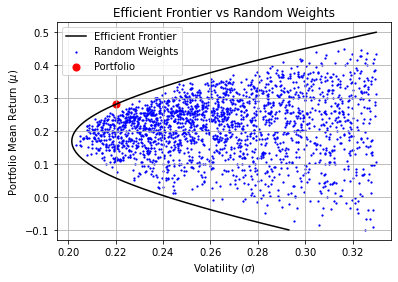

In [12]:
model.efficient_frontier()

estimate model of mean constraint

0.44999999999999996
0.29965783210073293
[[-0.2357303 ]
 [ 0.07055172]
 [ 0.32376533]
 [-0.29480577]
 [ 0.14815549]
 [ 0.64994121]
 [ 0.29088717]
 [ 0.04723515]]


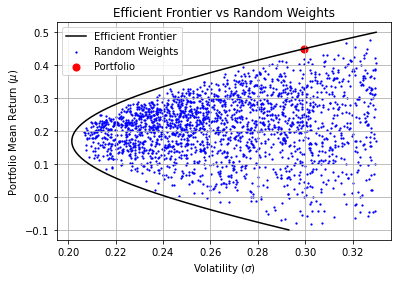

In [13]:
model.estimate_model(optimization_type="MEANCONSTRAINT", constraint=0.45, allow_short_selling=True)
print(model.mu_p)
print(model.vol_p)
print(model.weights)
model.efficient_frontier()

now without short selling, see that the portfolio becomes "theoretically" not efficient

0.4000000000000001
0.29110278298756975
[[1.69920687e-17]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.10718193e-17]
 [2.20719615e-01]
 [7.47351532e-01]
 [3.19288531e-02]
 [1.34596687e-17]]


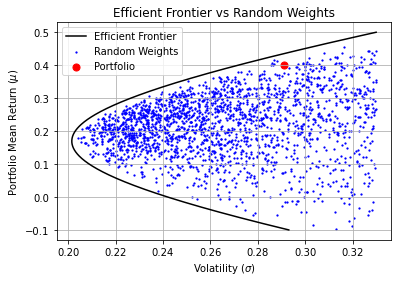

In [20]:
model.estimate_model(optimization_type="MEANCONSTRAINT", constraint=0.4, allow_short_selling=False)
print(model.mu_p)
print(model.vol_p)
print(model.weights)
model.efficient_frontier()

trail run for backtesting

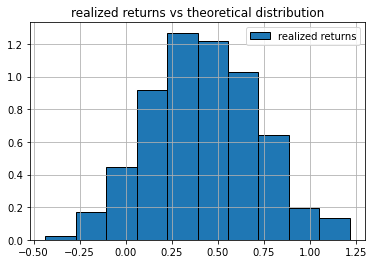

Mean Realized Returns: 0.424479
Volatility Realized Returns: 0.294119


In [22]:
model.backtests(training_sample=training_sample, testing_sample=testing_sample, 
                optimization_type="MEANCONSTRAINT", allow_short_selling=False)
